# 03_MAG_gtdbtk

This document explores the MAG GTDB output. Imported data is the original data files from google drive. This document is written in the Python coding language.

## Load packages and data

In [135]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

jv119_arc = pd.read_csv('/Users/melissaherring/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-119/jv-119.ar53.summary.tsv',sep='\t')
jv119_bac = pd.read_csv('/Users/melissaherring/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-119/jv-119.bac120.summary.tsv',sep='\t')
jv121_arc = pd.read_csv('/Users/melissaherring/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-121/jv-121.ar53.summary.tsv',sep='\t')
jv121_bac = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-121/jv-121.bac120.summary.tsv',sep='\t')
jv132_arc = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-132/jv-132.ar53.summary.tsv',sep='\t')
jv132_bac = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-132/jv-132.bac120.summary.tsv',sep='\t')
jv154_arc = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-154/jv-154.ar53.summary.tsv',sep='\t')
jv154_bac = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/gtdbtk/jv-154/jv-154.bac120.summary.tsv',sep='\t')

# create sample_name column
jv119_arc['sample_name'] = "JV119"
jv119_bac['sample_name'] = "JV119"
jv121_arc['sample_name'] = "JV121"
jv121_bac['sample_name'] = "JV121"
jv132_arc['sample_name'] = "JV132"
jv132_bac['sample_name'] = "JV132"
jv154_arc['sample_name'] = "JV154"
jv154_bac['sample_name'] = "JV154"

# create sample_depth column
jv119_arc['sample_depth'] = 400
jv119_bac['sample_depth'] = 400
jv121_arc['sample_depth'] = 95
jv121_bac['sample_depth'] = 95
jv132_arc['sample_depth'] = 80
jv132_bac['sample_depth'] = 80
jv154_arc['sample_depth'] = 140
jv154_bac['sample_depth'] = 140

# combine all data frames into one data set
combo = pd.concat([jv119_arc, jv119_bac, jv121_arc, jv121_bac, jv132_arc, jv132_bac, jv154_arc, jv154_bac])

# split the classification into tax level columns and rename
combo[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=combo.classification.str.split(';', expand=True)
combo['domain'] = combo['domain'].str.replace('d__', '') # remove the d__ in front of all observations
combo['phyla'] = combo['phyla'].str.replace('p__', '')
combo['class'] = combo['class'].str.replace('c__', '')
combo['order'] = combo['order'].str.replace('o__', '')
combo['family'] = combo['family'].str.replace('f__', '')
combo['genus'] = combo['genus'].str.replace('g__', '')
combo['species'] = combo['species'].str.replace('s__', '')
combo

,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,...,warnings,sample_name,sample_depth,domain,phyla,class,order,family,genus,species
0,bin_101,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,GCA_002731905.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,98.12,0.737,GCA_002731905.1,95.0,d__Archaea;p__Thermoplasmatota;c__Poseidoniia;...,...,NaN,JV119,400,Archaea,Thermoplasmatota,Poseidoniia,MGIII,CG-Epi1,UBA8886,UBA8886 sp002731905
1,bin_103,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,JV119,400,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,JABIAG01,,
2,bin_107,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,JV119,400,Archaea,Nanoarchaeota,Nanoarchaeia,SCGC-AAA011-G17,JACPNG01,,
3,bin_112,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,NaN,NaN,NaN,NaN,NaN,GCA_016185615.1,95.0,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,...,NaN,JV119,400,Archaea,Nanoarchaeota,Nanoarchaeia,SCGC-AAA011-G17,JACPNG01,JACPNE01,
4,bin_120,d__Archaea;p__Undinarchaeota;c__Undinarchaeia;...,NaN,NaN,NaN,NaN,NaN,GCA_002502135.1,95.0,d__Archaea;p__Undinarchaeota;c__Undinarchaeia;...,...,Genome not assigned to closest species as it f...,JV119,400,Archaea,Undinarchaeota,Undinarchaeia,Undinarchaeales,UBA543,UBA543,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,bin_95,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,GCA_002686135.1,95.0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,96.77,0.856,GCA_002686135.1,95.0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,...,NaN,JV154,140,Bacteria,Pseudomonadota,Alphaproteobacteria,UBA11136,UBA11136,UBA11136,UBA11136 sp002686135
125,bin_96,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,NaN,NaN,NaN,NaN,GCA_022572185.1,95.0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,...,Genome not assigned to closest species as it f...,JV154,140,Bacteria,Pseudomonadota,Gammaproteobacteria,Woeseiales,Woeseiaceae,JACZWL01,
126,bin_97,Unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No bacterial or archaeal marker,JV154,140,Unclassified,None,None,None,None,None,None
127,bin_98,Unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No bacterial or archaeal marker,JV154,140,Unclassified,None,None,None,None,None,None


In [136]:
# write csv file
combo.to_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/all_mag_gtdb.csv', index=False)

## How many MAGs were classified in total?

In [ ]:
total = len(combo['domain'])
total

## How many MAGs were classified to at least that classification level?

In [ ]:
d_mag = len(combo[combo['domain']!='d__'])
p_mag = len(combo[combo['phyla']!='p__'])
c_mag =len(combo[combo['class']!='c__'])
o_mag=len(combo[combo['order']!='o__'])
f_mag=len(combo[combo['family']!='f__'])
g_mag=len(combo[combo['genus']!='g__']) 
s_mag=len(combo[combo['species']!='s__'])

# create a data frame of the number of MAGs associated with each level
dict = {'tax_level': ['total', 'domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'num_MAGs_classified':
   [total, d_mag, p_mag, c_mag, o_mag, f_mag, g_mag, s_mag]}
GTDB_tax = pd.DataFrame(data = dict)

# add a column to the dataframe that is the percent of MAGs
GTDB_tax['percent_classified']=GTDB_tax['num_MAGs_classified']/total*100

GTDB_tax

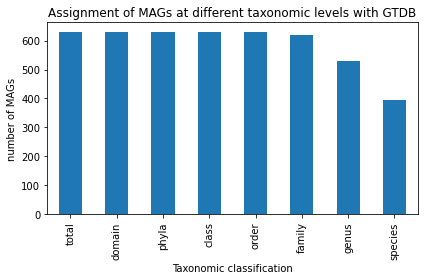

In [133]:
# count plot
GTDB_tax.plot(kind='bar', x='tax_level', y='num_MAGs_classified',legend=None)
plt.xlabel('Taxonomic classification')
plt.ylabel('number of MAGs')
plt.title('Assignment of MAGs at different taxonomic levels with GTDB')
plt.tight_layout()

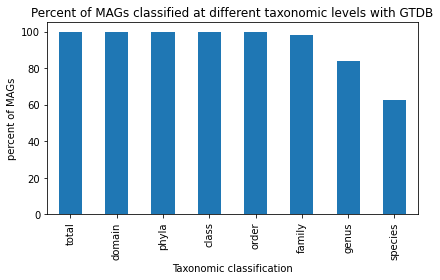

In [134]:
# percent plot
GTDB_tax.plot(kind='bar', x='tax_level', y='percent_classified',legend=None)
plt.xlabel('Taxonomic classification')
plt.ylabel('percent of MAGs')
plt.title('Percent of MAGs classified at different taxonomic levels with GTDB')
plt.tight_layout()

## What are the most common classifications?

In [ ]:
Counter(combo['classification']).most_common()[:10]

In [ ]:
# top 5 groups in each level
for taxa in ['domain', 'phyla','class','order','family','genus','species']:
    print(combo.groupby(taxa)['user_genome'].count().sort_values(ascending=False)[:5])
    print("\n")

#### Phyla

Text(0.5, 1.0, 'Number of MAGs belonging to the top 10 most abundant phyla with GTDB')

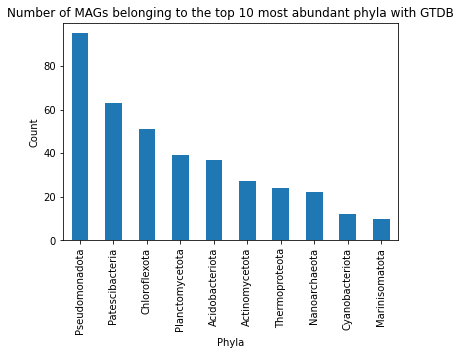

In [131]:
phyla_df = combo.groupby('phyla', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_phyla = phyla_df [:10]

top_phyla.plot('phyla','user_genome',kind = 'bar',legend=None)
plt.xlabel('Phyla')
plt.ylabel('Count')
plt.title('Number of MAGs belonging to the top 10 most abundant phyla with GTDB')

#### Class

Text(0.5, 1.0, 'Number of MAGs belonging to the top 10 most abundant classes with GTDB')

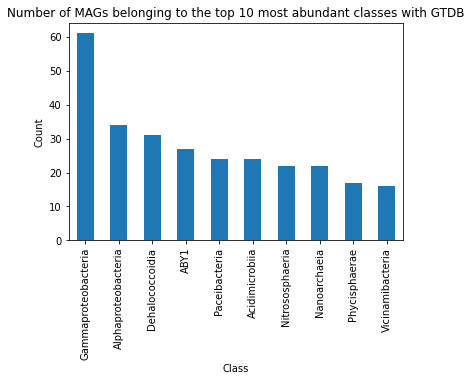

In [132]:
class_df = combo.groupby('class', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_class = class_df [:10]

top_class.plot('class','user_genome',kind = 'bar',legend=None)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of MAGs belonging to the top 10 most abundant classes with GTDB')

#### Order

Text(0.5, 1.0, 'Number of MAGs belonging to the top 10 most abundant orders with GTDB')

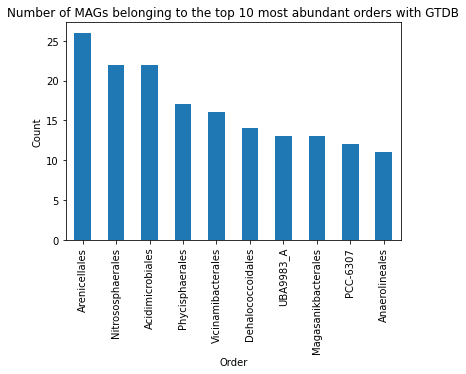

In [130]:
order_df = combo.groupby('order', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_order = order_df [:10]

top_order.plot('order','user_genome',kind = 'bar',legend=None)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Number of MAGs belonging to the top 10 most abundant orders with GTDB')